**Before running this notebook**
1. Open Anaconda Prompt
2. Type: conda install geopandas
3. Type: conda install dash

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd

In [2]:
bus_stops = pd.read_csv('./datasets/bus_stops.csv')
bus_stops.drop(columns=bus_stops.columns[0], axis=1,  inplace=True)
bus_stops = bus_stops.drop_duplicates()
gdf = gpd.GeoDataFrame(bus_stops, geometry=gpd.points_from_xy(bus_stops.Longitude, bus_stops.Latitude))
gdf.set_crs(epsg=4326, inplace=True)
regions = gpd.read_file('./datasets/stanford-yn701pv2861-geojson.json')

result = gpd.sjoin(gdf, regions, how='left', op='within')

bus_stops['Region'] = result['name_1']
bus_stops.drop([2514, 2319, 2315, 2316], inplace=True)
bus_stops.dropna(inplace=True)

bus_stops

c:\Users\ngwee\Anaconda3\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


,BusStopCode,RoadName,Description,Latitude,Longitude,geometry,Region
0,481,Woodlands Rd,BT PANJANG TEMP BUS PK,1.383764,103.758300,POINT (103.75830 1.38376),West
1,1012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,POINT (103.85254 1.29685),Central
2,1013,Victoria St,St. Joseph's Ch,1.297710,103.853225,POINT (103.85322 1.29771),Central
3,1019,Victoria St,Bras Basah Cplx,1.296990,103.853022,POINT (103.85302 1.29699),Central
4,1029,Nth Bridge Rd,Cosmic Insurance Bldg,1.296673,103.854414,POINT (103.85441 1.29667),Central
...,...,...,...,...,...,...,...
5016,99139,Changi Village Rd,Blk 5,1.388195,103.987234,POINT (103.98723 1.38819),East
5017,99161,Nicoll Dr,Bef Changi Beach CP 3,1.390262,103.992957,POINT (103.99296 1.39026),East
5018,99171,Nicoll Dr,Changi Beach CP 2,1.391128,103.991021,POINT (103.99102 1.39113),East
5019,99181,Telok Paku Rd,Bef S'pore Aviation Ac,1.387754,103.988503,POINT (103.98850 1.38775),East


In [3]:
bus_routes = pd.read_csv('./datasets/bus_routes.csv')
bus_routes.drop(columns=bus_routes.columns[0], axis=1,  inplace=True)
bus_routes = bus_routes.drop_duplicates()
bus_routes.replace("-", np.NaN, inplace=True)
bus_routes = bus_routes.dropna()
bus_routes = bus_routes.reset_index(drop=True)

bus_routes

,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus
0,10,SBST,1,1,75009,0.0,0500,2300,0500,2300,0500,2300
1,10,SBST,1,2,76059,0.6,0502,2302,0502,2302,0502,2302
2,10,SBST,1,3,76069,1.1,0504,2304,0504,2304,0503,2304
3,10,SBST,1,4,96289,2.3,0508,2308,0508,2309,0507,2308
4,10,SBST,1,5,96109,2.7,0509,2310,0509,2311,0508,2309
...,...,...,...,...,...,...,...,...,...,...,...,...
20388,CT8,SBST,2,17,54191,16.3,1143,1745,1142,2243,1141,2243
20389,CT8,SBST,2,18,54201,16.6,1143,1746,1142,2243,1142,2243
20390,CT8,SBST,2,19,55131,16.9,1144,1747,1143,2244,1142,2244
20391,CT8,SBST,2,20,55141,17.2,1145,1748,1144,2245,1143,2245


In [4]:
bus_services = pd.read_csv('./datasets/bus_services.csv')
bus_services.drop(columns=bus_services.columns[[0, -1]], axis=1,  inplace=True)
bus_services = bus_services.drop_duplicates()
bus_services.replace("-", np.NaN, inplace=True)
bus_services = bus_services.dropna()
bus_services = bus_services.reset_index(drop=True)
bus_services[['OriginCode', 'DestinationCode']] = bus_services[['OriginCode', 'DestinationCode']].astype(int)

def findMeanFreq(col):
    test = bus_services[col].str.split("-", expand = True)
    test.fillna(0, inplace=True)
    test = test.astype(int)
    test[col] = test.mean(axis=1)
    bus_services[col] = test[col]

findMeanFreq('AM_Peak_Freq')
findMeanFreq('AM_Offpeak_Freq')
findMeanFreq('PM_Peak_Freq')
findMeanFreq('PM_Offpeak_Freq')

bus_services

,ServiceNo,Operator,Direction,Category,OriginCode,DestinationCode,AM_Peak_Freq,AM_Offpeak_Freq,PM_Peak_Freq,PM_Offpeak_Freq
0,118,GAS,1,TRUNK,65009,97009,7.0,11.5,11.0,13.0
1,118,GAS,2,TRUNK,97009,65009,5.0,11.0,8.0,12.5
2,119,GAS,1,TRUNK,65009,65009,12.0,15.0,14.5,16.0
3,12,GAS,1,TRUNK,77009,10499,4.5,11.5,9.5,12.0
4,12,GAS,2,TRUNK,10499,77009,5.0,11.5,11.0,12.0
...,...,...,...,...,...,...,...,...,...,...
483,225,SBST,1,FEEDER,84009,84009,4.0,8.0,4.5,8.0
484,225,SBST,2,FEEDER,84009,84009,5.0,7.0,5.5,7.0
485,243,SBST,1,FEEDER,22009,22009,5.5,4.5,4.0,6.0
486,243,SBST,2,FEEDER,22009,22009,6.5,5.0,4.0,6.5


In [5]:
bus_vol = pd.read_csv('./datasets/transport_node_bus_202212.csv')
bus_vol = bus_vol.drop_duplicates()
bus_vol.rename(columns = {'PT_CODE':'BusStopCode'}, inplace = True)

bus_vol = pd.merge(bus_vol, bus_stops, on='BusStopCode', how='left')
bus_vol.drop(['RoadName', 'Description', 'geometry', 'Latitude', 'Longitude'], axis=1, inplace=True)

bus_vol

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,BusStopCode,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,Region
0,2022-12,WEEKENDS/HOLIDAY,17,BUS,45379,128,82,West
1,2022-12,WEEKDAY,17,BUS,45379,336,282,West
2,2022-12,WEEKENDS/HOLIDAY,13,BUS,80051,1158,1025,Central
3,2022-12,WEEKDAY,13,BUS,80051,2053,1949,Central
4,2022-12,WEEKENDS/HOLIDAY,13,BUS,5319,9,47,Central
...,...,...,...,...,...,...,...,...
197959,2022-12,WEEKDAY,7,BUS,51011,894,934,Central
197960,2022-12,WEEKENDS/HOLIDAY,18,BUS,70149,309,229,Central
197961,2022-12,WEEKDAY,18,BUS,70149,1165,821,Central
197962,2022-12,WEEKENDS/HOLIDAY,6,BUS,13139,26,224,Central


In [6]:
trains_coord = pd.read_csv('./datasets/MRT Stations.csv')
trains_coord.drop(['Unnamed: 0', 'OBJECTID'], axis=1, inplace=True)

gdf = gpd.GeoDataFrame(trains_coord, geometry=gpd.points_from_xy(trains_coord.Longitude, trains_coord.Latitude))
gdf.set_crs(epsg=4326, inplace=True)
regions = gpd.read_file('./datasets/stanford-yn701pv2861-geojson.json')

result = gpd.sjoin(gdf, regions, how='left', op='within')

trains_coord['Region'] = result['name_1']
trains_coord

c:\Users\ngwee\Anaconda3\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


,STN_NAME,STN_NO,geometry,Latitude,Longitude,Region
0,EUNOS MRT STATION,EW7,POINT (103.90325 1.31978),1.319779,103.903252,Central
1,CHINESE GARDEN MRT STATION,EW25,POINT (103.73260 1.34235),1.342353,103.732597,West
2,KHATIB MRT STATION,NS14,POINT (103.83298 1.41738),1.417383,103.832980,North
3,KRANJI MRT STATION,NS7,POINT (103.76217 1.42518),1.425178,103.762165,North
4,REDHILL MRT STATION,EW18,POINT (103.81682 1.28956),1.289563,103.816817,Central
...,...,...,...,...,...,...
166,SPRINGLEAF MRT STATION,TE4,POINT (103.81808 1.39816),1.398161,103.818082,North
167,LENTOR MRT STATION,TE5,POINT (103.83647 1.38506),1.385062,103.836469,North-East
168,MAYFLOWER MRT STATION,TE6,POINT (103.83682 1.37209),1.372087,103.836824,North-East
169,BRIGHT HILL MRT STATION,TE7,POINT (103.83294 1.36331),1.363308,103.832936,Central


In [7]:
train_vol = pd.read_csv('./datasets/transport_node_train_202212.csv')
train_vol = train_vol.drop_duplicates()
train_vol.rename(columns = {'PT_CODE':'STN_NO'}, inplace = True)

train_vol = pd.merge(train_vol, trains_coord, on='STN_NO', how='left')
train_vol.drop(['STN_NAME', 'geometry', 'Latitude', 'Longitude'], axis=1, inplace=True)
train_vol

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,STN_NO,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,Region
0,2022-12,WEEKENDS/HOLIDAY,11,TRAIN,NS7,5905,4155,North
1,2022-12,WEEKDAY,11,TRAIN,NS7,9985,8096,North
2,2022-12,WEEKDAY,16,TRAIN,SW4,1317,1385,North-East
3,2022-12,WEEKENDS/HOLIDAY,16,TRAIN,SW4,685,690,North-East
4,2022-12,WEEKENDS/HOLIDAY,10,TRAIN,CC5,777,1379,Central
...,...,...,...,...,...,...,...,...
9327,2022-12,WEEKDAY,7,TRAIN,NS27/CE2/TE20,108,297,NaN
9328,2022-12,WEEKDAY,7,TRAIN,CE2,108,297,NaN
9329,2022-12,WEEKENDS/HOLIDAY,7,TRAIN,CE2,48,103,NaN
9330,2022-12,WEEKENDS/HOLIDAY,12,TRAIN,SE5,1088,718,North-East


In [8]:
riderYrly = pd.read_csv('./datasets/yearly_ave_daily_pt_ridership.csv')
riderYrly = riderYrly.drop_duplicates()

riderYrly

,year,mode,ridership
0,1995,MRT,740000
1,1995,LRT,0
2,1995,Bus,3009000
3,1996,MRT,850000
4,1996,LRT,0
...,...,...,...
76,2020,LRT,139000
77,2020,Bus,2878000
78,2021,MRT,2100000
79,2021,LRT,151000


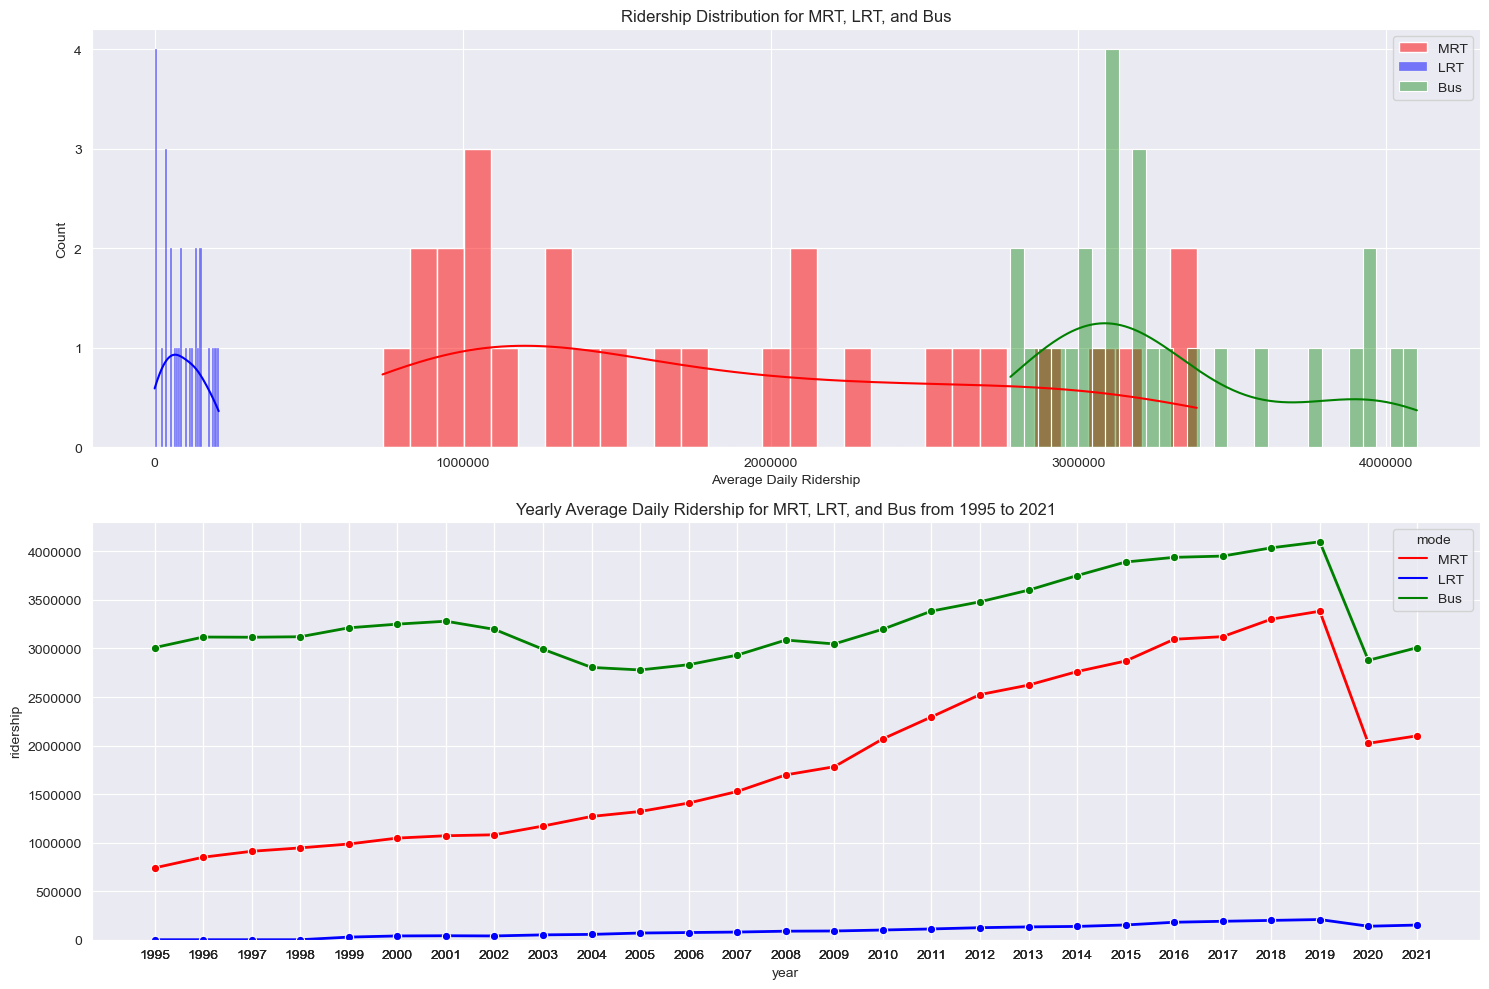

In [9]:
sns.set_style("darkgrid")
sns.set_palette("muted")

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(15,10))

sns.histplot(x='ridership', data=riderYrly[riderYrly['mode'] == 'MRT'], kde=True, bins=30, color='red', label='MRT', ax=ax[0])
sns.histplot(x='ridership', data=riderYrly[riderYrly['mode'] == 'LRT'], kde=True, bins=30, color='blue', label='LRT', ax=ax[0])
sns.histplot(x='ridership', data=riderYrly[riderYrly['mode'] == 'Bus'], kde=True, bins=30, color='green', label='Bus', ax=ax[0], alpha=0.4)
ax[0].legend()
ax[0].set(title = 'Ridership Distribution for MRT, LRT, and Bus', xlabel='Average Daily Ridership')
ax[0].set_yticks([0, 1, 2, 3, 4])
ax[0].ticklabel_format(style='plain', axis='x')

# Plot the line plot
mode_colour = {'MRT': 'red', 'LRT': 'blue', 'Bus': 'green'}
sns.lineplot(x='year', y='ridership', data=riderYrly, hue='mode', ax=ax[1], marker='o', linewidth=2, palette=mode_colour)
ax[1].set(title='Yearly Average Daily Ridership for MRT, LRT, and Bus from 1995 to 2021')
ax[1].set_ylim(0, None)
ax[1].set_xticks(riderYrly.year)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

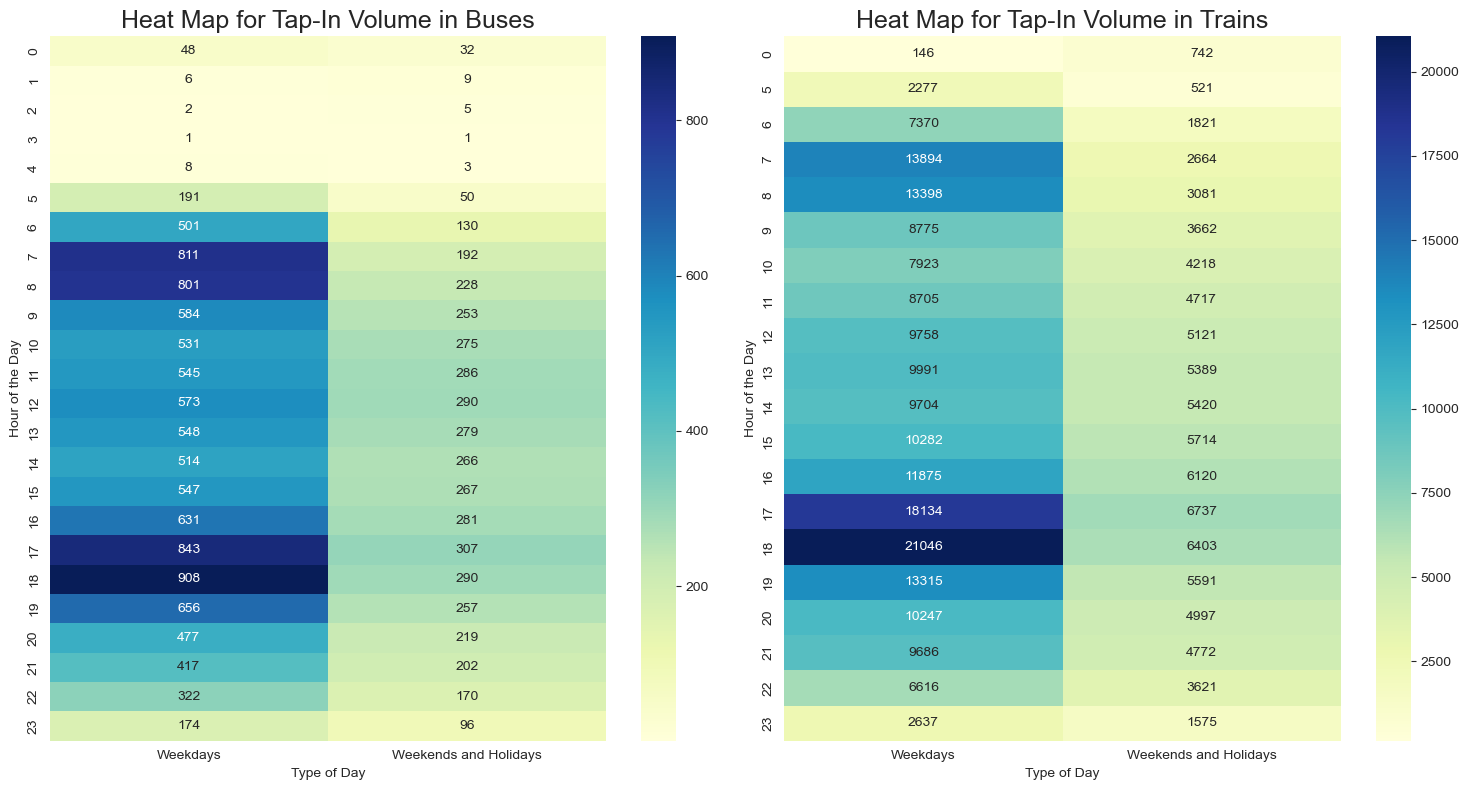

In [10]:
pivot_df_bus = bus_vol.pivot_table(values='TOTAL_TAP_IN_VOLUME', index='TIME_PER_HOUR', columns='DAY_TYPE')
pivot_df_bus = pivot_df_bus[['WEEKDAY', 'WEEKENDS/HOLIDAY']].astype(int)

pivot_df_train = train_vol.pivot_table(values='TOTAL_TAP_IN_VOLUME', index='TIME_PER_HOUR', columns='DAY_TYPE')
pivot_df_train = pivot_df_train[['WEEKDAY', 'WEEKENDS/HOLIDAY']].astype(int)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,8))

sns.heatmap(pivot_df_bus, annot=True, cmap='YlGnBu', ax=ax[0], fmt='g')
ax[0].set(xlabel='Type of Day', ylabel='Hour of the Day', xticklabels=['Weekdays', 'Weekends and Holidays'])
ax[0].set_title('Heat Map for Tap-In Volume in Buses', fontsize=18)

sns.heatmap(pivot_df_train, annot=True, cmap='YlGnBu', ax=ax[1], fmt='g')
ax[1].set(xlabel='Type of Day', ylabel='Hour of the Day', xticklabels=['Weekdays', 'Weekends and Holidays'])
ax[1].set_title('Heat Map for Tap-In Volume in Trains', fontsize=18)

plt.tight_layout()
plt.show()

In [11]:
pivot_df_bus

DAY_TYPE,WEEKDAY,WEEKENDS/HOLIDAY
TIME_PER_HOUR,,
0,48,32
1,6,9
2,2,5
3,1,1
4,8,3
5,191,50
6,501,130
7,811,192
8,801,228


In [12]:
bus_vol_box = bus_vol[(bus_vol['TOTAL_TAP_IN_VOLUME'] > 20000) & (bus_vol['TOTAL_TAP_OUT_VOLUME'] > 20000)]
train_vol_box = train_vol[(train_vol['TOTAL_TAP_IN_VOLUME'] > 20000) & (train_vol['TOTAL_TAP_OUT_VOLUME'] > 20000)]

data = [
    go.Box(x=bus_vol_box['Region'], y=bus_vol_box['TOTAL_TAP_IN_VOLUME'], name="Bus Tap In Volume", visible=True),
    go.Box(x=train_vol_box['Region'], y=train_vol_box['TOTAL_TAP_IN_VOLUME'], name="Train Tap In Volume", visible=False),
    go.Box(x=bus_vol_box['Region'], y=bus_vol_box['TOTAL_TAP_OUT_VOLUME'], name="Bus Tap Out Volume", visible=False),
    go.Box(x=train_vol_box['Region'], y=train_vol_box['TOTAL_TAP_OUT_VOLUME'], name="Train Tap Out Volume", visible=False),
]

updatemenus = [
    dict(
        type="dropdown",
        buttons=[
            dict(
                label="Bus Tap In Volume",
                method="update",
                args=[
                    {"visible": [True, False, False, False]},
                    {"title": "Bus and Train Volume by Region", "yaxis_title": "Volume"},
                ],
            ),
            dict(
                label="Train Tap In Volume",
                method="update",
                args=[
                    {"visible": [False, True, False, False]},
                    {"title": "Bus and Train Volume by Region", "yaxis_title": "Volume"},
                ],
            ),
            dict(
                label="Bus Tap Out Volume",
                method="update",
                args=[
                    {"visible": [False, False, True, False]},
                    {"title": "Bus and Train Volume by Region", "yaxis_title": "Volume"},
                ],
            ),
            dict(
                label="Train Tap Out Volume",
                method="update",
                args=[
                    {"visible": [False, False, False, True]},
                    {"title": "Bus and Train Volume by Region", "yaxis_title": "Volume"},
                ],
            ),
        ],
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x = 1,
        xanchor = "right",
        y = 1.29,
        yanchor = "top"
    ),
]

layout = go.Layout(
    updatemenus=updatemenus,
    title="Bus and Train Volume by Region",
    yaxis_title="Volume",
    xaxis_title='Region'
)

fig = go.Figure(data=data, layout=layout)
fig.show()

**Objective 2**

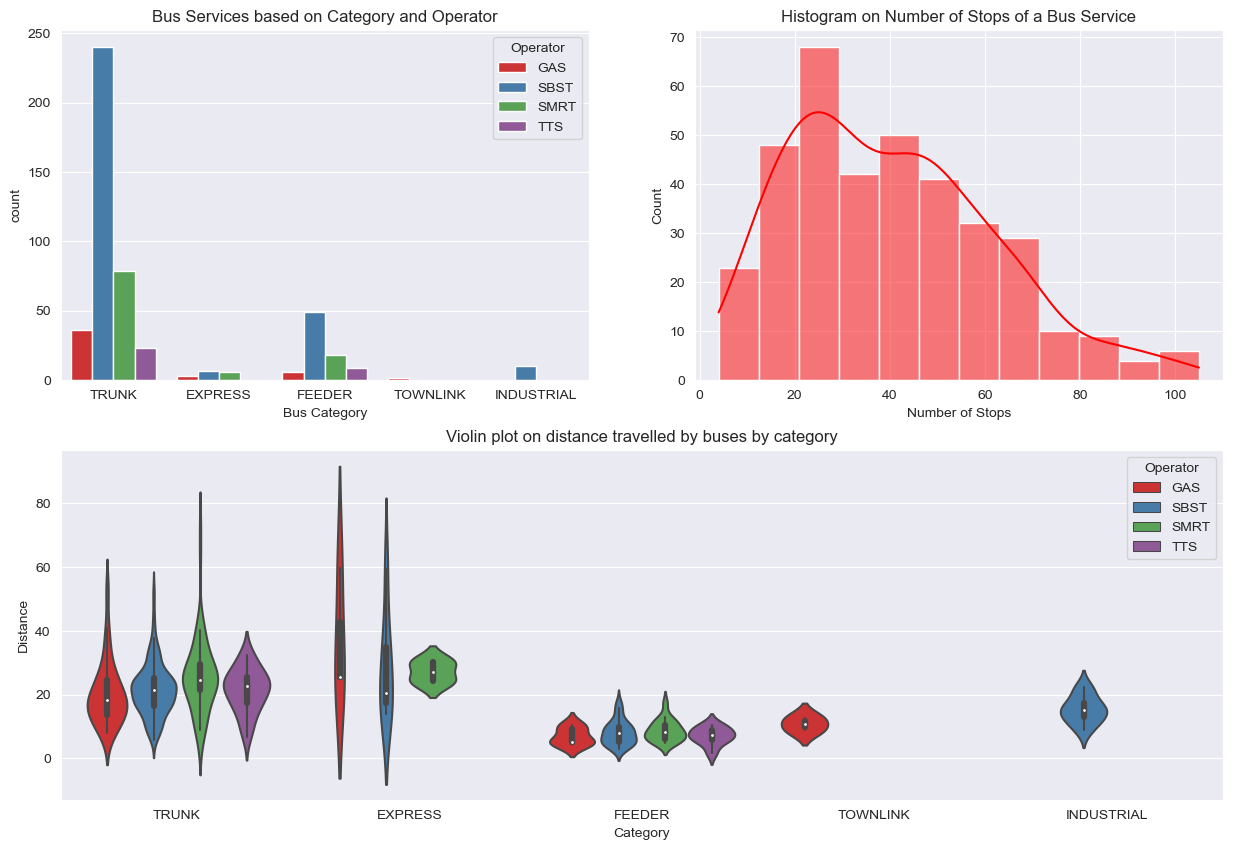

In [13]:
# Create a new column in the bus_routes dataset to store the number of stops for each bus route
bus_routes['NumStops'] = bus_routes.groupby('ServiceNo')['StopSequence'].transform(max)
#Since each bus service has a number of rows, the histogram will contain many repeated values.
bus_stop_distribution = bus_routes.drop_duplicates(subset='ServiceNo', keep='first')

#fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15,10))
fig = plt.figure(figsize=(15,10))

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# grouped bar chart
sns.countplot(x="Category", hue="Operator", data=bus_services, palette='Set1', ax=ax1)
ax1.legend(loc='upper right', title='Operator')
ax1.set(title = 'Bus Services based on Category and Operator', xlabel='Bus Category')

# histogram
sns.histplot(x='NumStops', data=bus_stop_distribution, kde=True, color='red', ax=ax2)
ax2.set(title = 'Histogram on Number of Stops of a Bus Service', xlabel='Number of Stops')

#boxplot
bus_service_dist = bus_routes.drop_duplicates(subset='ServiceNo', keep='last')
bus_service_dist = bus_service_dist[['ServiceNo', 'Distance']]
bus_services_merged = pd.merge(bus_services, bus_service_dist, on='ServiceNo')

sns.violinplot(x='Category', y='Distance', hue='Operator', data=bus_services_merged, ax=ax3, palette='Set1')
ax3.set(title='Violin plot on distance travelled by buses by category')

plt.show()

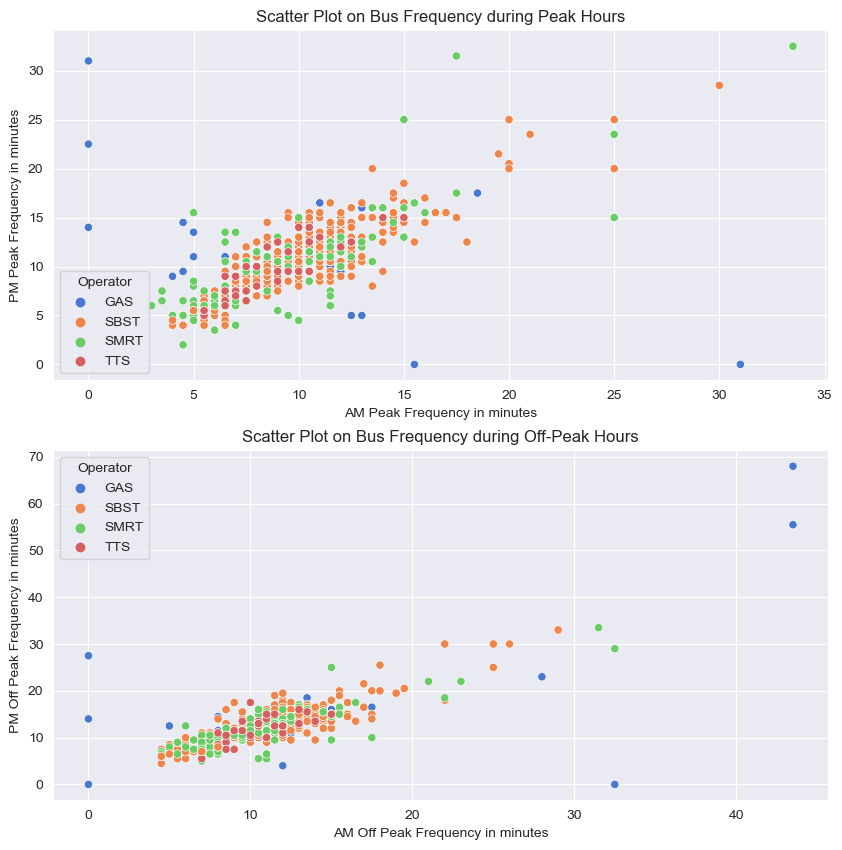

In [14]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(10,10))

# Create the scatterplot
sns.scatterplot(x='AM_Peak_Freq', y='PM_Peak_Freq', hue='Operator', data=bus_services, ax=ax[0])
ax[0].set_xlabel('AM Peak Frequency in minutes')
ax[0].set_ylabel('PM Peak Frequency in minutes')
ax[0].set_title('Scatter Plot on Bus Frequency during Peak Hours')

# Create the scatterplot
sns.scatterplot(x='AM_Offpeak_Freq', y='PM_Offpeak_Freq', hue='Operator', data=bus_services, ax=ax[1])
ax[1].set_xlabel('AM Off Peak Frequency in minutes')
ax[1].set_ylabel('PM Off Peak Frequency in minutes')
ax[1].set_title('Scatter Plot on Bus Frequency during Off-Peak Hours')

# Show the plot
plt.show()

In [15]:
stops_no = []
for region in bus_stops.Region.unique():
    stops_no.append(len(bus_stops[bus_stops['Region'] == region]))

data = {
    "name_1": bus_stops.Region.unique(),
    "Total Bus Stops In Region": stops_no
}

bus_stops_no = pd.DataFrame(data)

regions_coord = regions[['name_1', 'geometry']]
regions_coord

bus_stops_no = bus_stops_no.merge(regions_coord, on='name_1')
bus_stops_no = gpd.GeoDataFrame(bus_stops_no)

bus_stops_no.rename(columns={'name_1': 'Region'}, inplace=True)
bus_stops_no.set_index('Region', inplace=True)

In [16]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [17]:
scatter_map = px.scatter_mapbox(bus_stops, 
                        lat='Latitude', 
                        lon='Longitude', 
                        color='Region', 
                        mapbox_style='open-street-map', 
                        zoom=9.2, 
                        hover_data=['Description'],
                        title='Scatter Mapbox on bus stops around Singapore')

choropleth_map = px.choropleth_mapbox(bus_stops_no,
                           geojson=bus_stops_no.geometry,
                           locations=bus_stops_no.index,
                           color="Total Bus Stops In Region",
                           center={"lat": 1.290270, "lon": 103.851959},
                           mapbox_style="open-street-map",
                           zoom=9.2,
                           color_continuous_scale='Purp',
                           title='Choropleth Mapbox on bus stops in Singapore by region')

app = dash.Dash(__name__)

app.scatter_map = scatter_map
app.choropleth_map = choropleth_map

app.layout = html.Div(children=[
    html.H1('Bus Stops in Singapore',
    style={
            'textAlign': 'center',
            'color': '#FF0000',
    }),
    html.H4(
        children='Interactive plot made by Ng Wee Herng',
        style={
            'textAlign': 'center'
        }
    ),
    dcc.RadioItems(
        id='radio',
        options=[
            {'label': 'Scatter Map', 'value': 'scatter'},
            {'label': 'Choropleth Map', 'value': 'choropleth'}
        ],
        value='choropleth',
        style={
            'textAlign': 'center'
        }
    ),
    dcc.Graph(
        id='graph'
    ),
])

@app.callback(
    Output('graph', 'figure'),
    [Input(component_id='radio', component_property='value')]
)

def build_graph(value):
    if value == 'scatter':
        return scatter_map

    else:
        return choropleth_map

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
